# Exercise 7
#### Lars Kühmichel, Nicolas Wolf

## 3 Kernelized ridge regression

In [28]:
import numpy as np
from scipy import sparse
from scipy.sparse.linalg import spsolve
from scipy.sparse import csc_matrix, coo_matrix
import matplotlib.pyplot as plt
import imageio

In [2]:
y_all = np.array(imageio.imread("cc_90.png"))
gx, gy = np.meshgrid(np.arange(y_all.shape[0]), np.arange(y_all.shape[1]))
X = np.stack([gx.flatten(), gy.flatten()], axis=1)
y = y_all.copy().flatten()
mask = y != 0
y = y[mask]
X_new = X[~mask]
X = X[mask]
missing_indices = np.arange(len(mask))[~mask]
print(y.shape)
print(X.shape)
print(X_new.shape)
print(missing_indices.shape)

(8450,)
(8450, 2)
(76050, 2)
(76050,)


In [37]:
def kernel(X1, X2, sigma, radius):
    dist = X1[:,np.newaxis] - X2
    dist = dist[:,:,0]**2 + dist[:,:,1]**2
    K = np.exp(-(dist)/(2*sigma**2))
    K[dist >= radius**2] = 0
    return sparse.csc_matrix(K)

In [19]:
sigma = 50
radius = 5
tau = 10
G = kernel(X, X, sigma, radius)
tau_I = sparse.identity(X.shape[0]) * tau
G_tau = G + tau_I

In [20]:
y_res = y_all.copy().flatten()
y_new = np.zeros(len(X_new))
for i, x_new in enumerate(X_new):
    if i % 1000 == 0:
        print(i)
    kappa_T = kernel(x_new[np.newaxis,:], X, sigma, radius).toarray().T[:,0]
    #print(kappa_T.shape)
    x = spsolve(G_tau, kappa_T)
    #print(x.shape)
    y_new[i] = y.dot(x)
    
y_res[missing_indices] = y_new
    

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000


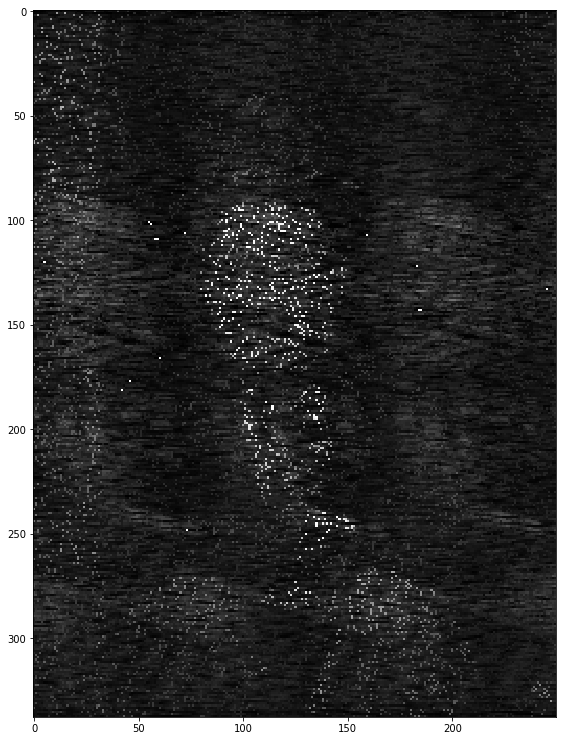

In [21]:
plt.figure(figsize=(13,13))
plt.imshow(y_res.reshape(338,250), cmap="gray")

In [60]:
%%time

sigma2 = 50
radius2 = 50
y_res2 = y_all.copy().flatten()
y_new2 = np.zeros(len(X_new))
for i, x_new in enumerate(X_new):
    if i % 10000 == 0:
        print(i)
    kappa = kernel(x_new[np.newaxis,:], X, sigma2, radius2).toarray()[0]
    y_new2[i] = (y.dot(kappa)) / kappa.sum()
    
    
y_res2[missing_indices] = y_new2
    

0
10000
20000
30000
40000
50000
60000
70000
Wall time: 1min 15s


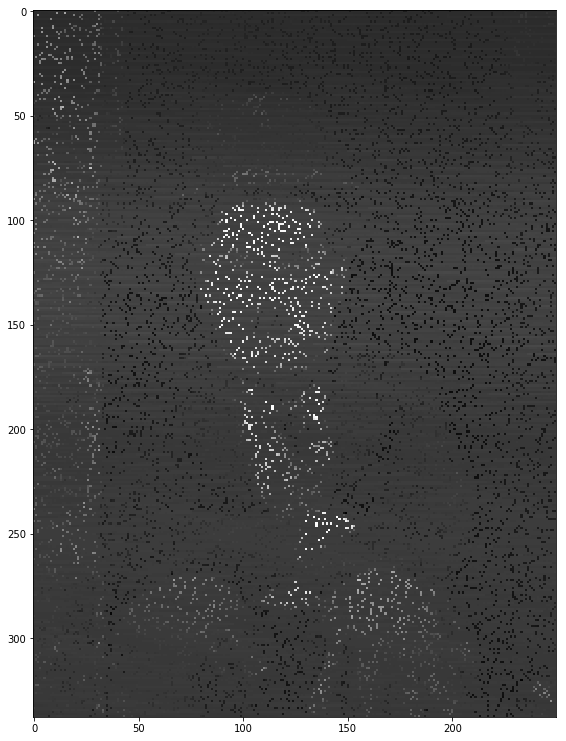

In [61]:
plt.figure(figsize=(13,13))
plt.imshow(y_res2.reshape(338,250), cmap="gray")

sigma = 10, radius = 5


C:\Users\nwolf\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


sigma = 10, radius = 10
sigma = 10, radius = 30
sigma = 10, radius = 50
sigma = 20, radius = 5
sigma = 20, radius = 10
sigma = 20, radius = 30
sigma = 20, radius = 50
sigma = 50, radius = 5
sigma = 50, radius = 10
sigma = 50, radius = 30
sigma = 50, radius = 50
sigma = 100, radius = 5
sigma = 100, radius = 10
sigma = 100, radius = 30
sigma = 100, radius = 50


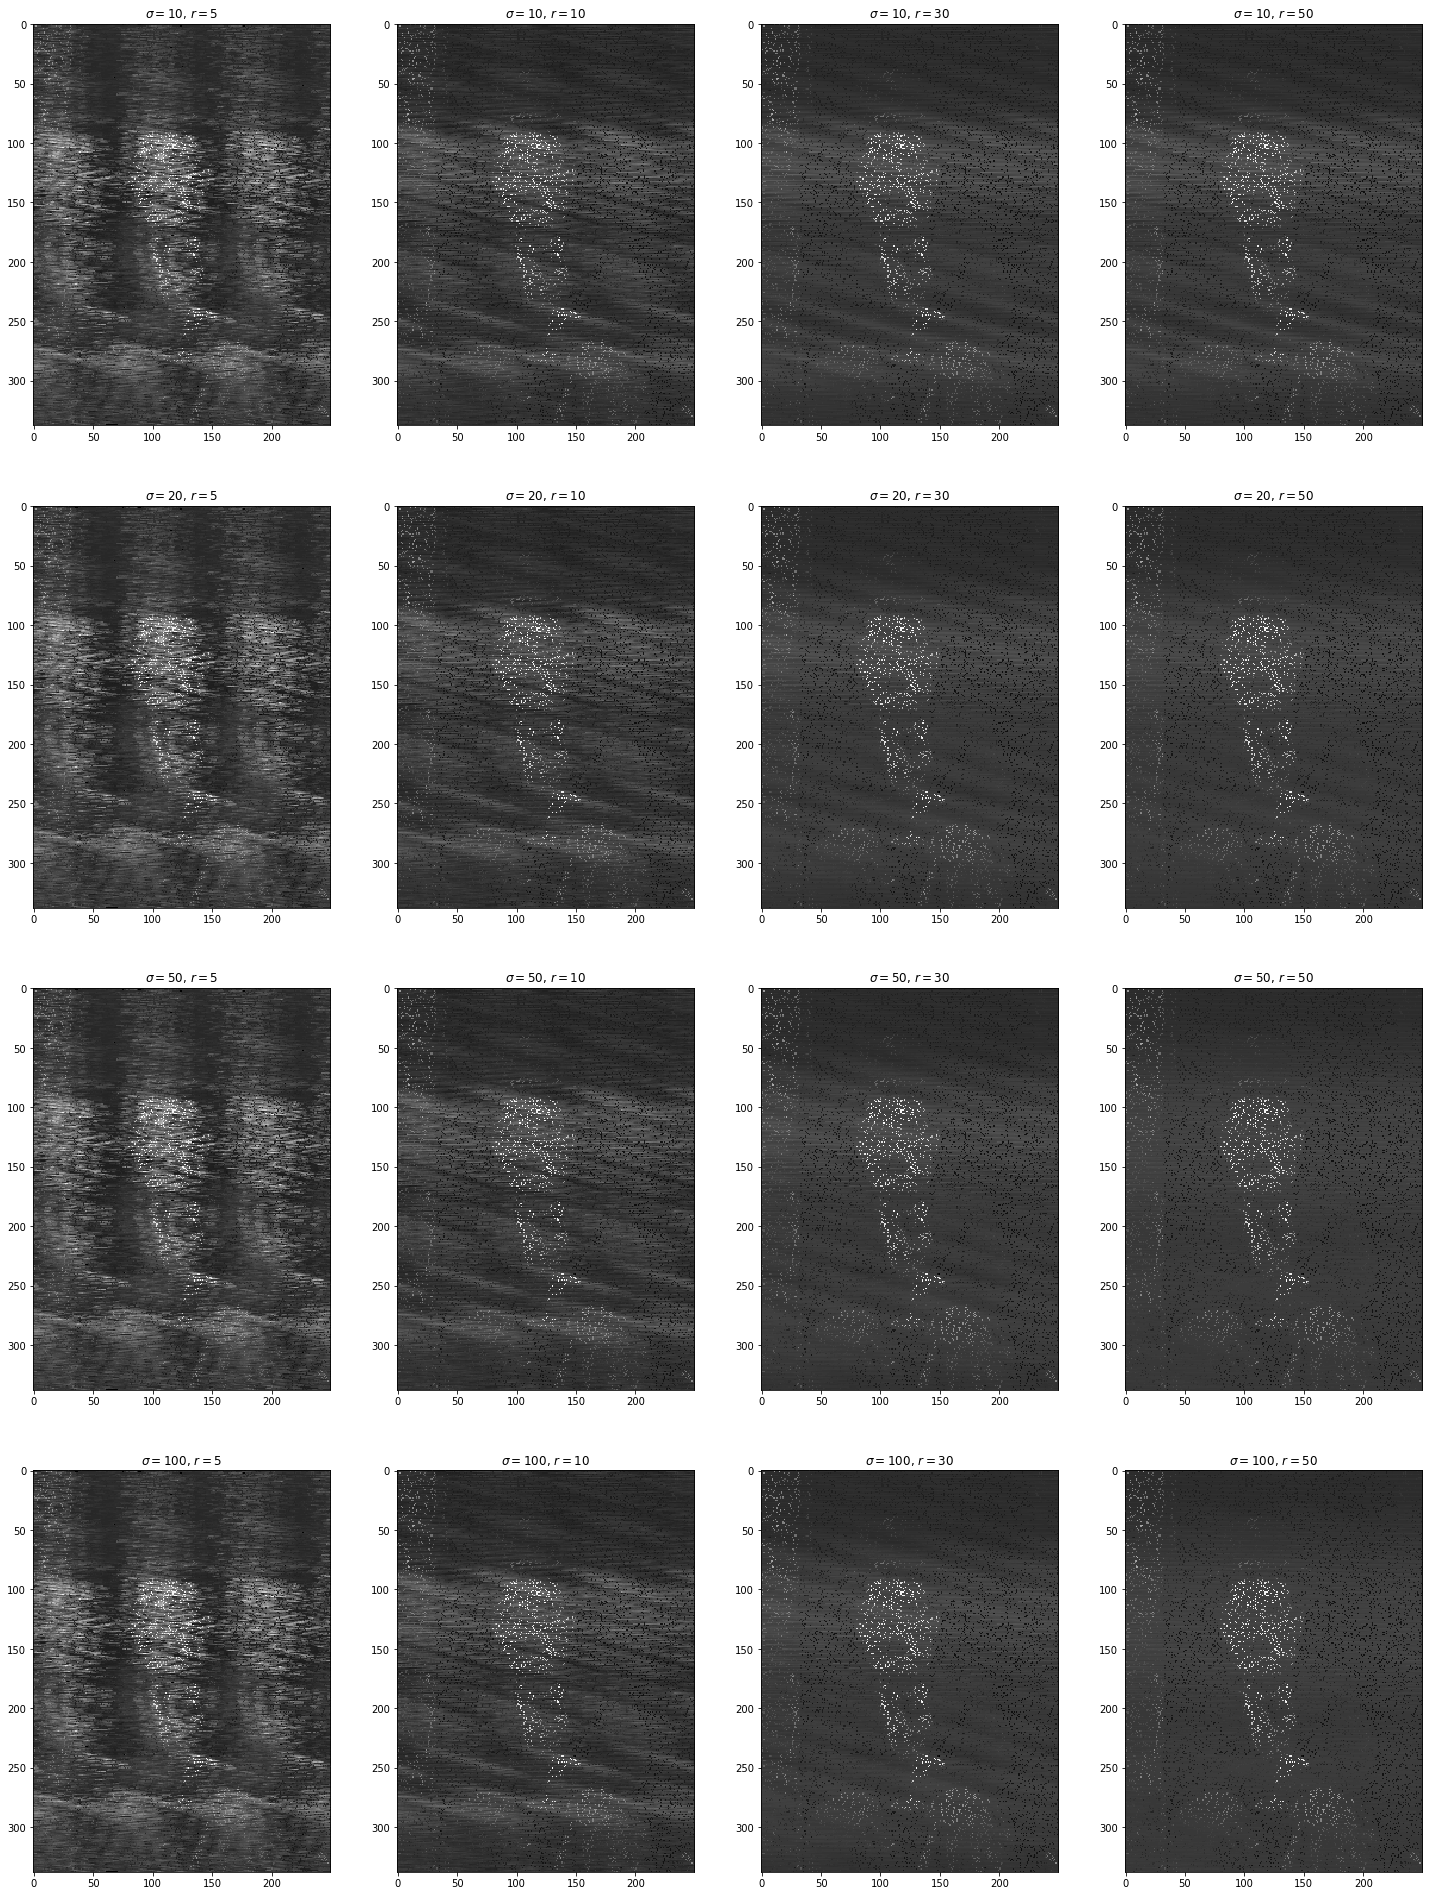

In [71]:
sigmas = [10, 20, 50, 100]
radii = [5, 10, 30, 50]

fig, axs = plt.subplots(4, 4, figsize=(25, 34))
for i, s in enumerate(sigmas):
    for j, r in enumerate(radii):
        print(f"sigma = {s}, radius = {r}")
        y_res2 = y_all.copy().flatten()
        y_new2 = np.zeros(len(X_new))
        for k, x_new in enumerate(X_new):
            kappa = kernel(x_new[np.newaxis,:], X, s, r).toarray()[0]
            y_new2[k] = (y.dot(kappa)) / kappa.sum()

        y_res2[missing_indices] = y_new2
        
        axs[i, j].imshow(y_res2.reshape((338,250)), cmap="gray")
        axs[i, j].set_title(f"$\sigma={s}$, $r={r}$")




Both methods give more or less the same results. In the images from Nadaraya-Watson regression, one can see more noise for small sigmas/radii. The kernelized ridge regression is very slow (because of spsolve) which becomes worse for a higher radius since the kernel matrix becomes less sparse. Therefore we couldn't compare different values for sigma, tau, r